<a href="https://colab.research.google.com/github/shinjeongdong/MLDeeplearningStudy/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5_%EB%94%A5%EB%9F%AC%EB%8B%9D_3%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%86%90%EA%B8%80%EC%94%A8_%EC%88%AB%EC%9E%90_%EC%9D%B8%EC%8B%9D_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#손글씨 숫자 인식
#2025-05-14
import numpy as np
import importlib
import sys
import pickle
importlib.invalidate_caches()
sys.path.append('/content/drive/MyDrive/dataset')

In [30]:
from mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,normalize=False)

In [31]:
print(x_train.shape) # 784개의 픽셀의 가진 이미지 6만개 학습용 데이터
print(t_train.shape) # 그에 대응 되는 정답 데이터 6만개.
print(x_test.shape) #여긴 테스트 데이터 1만개
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


5
(784,)
(28, 28)


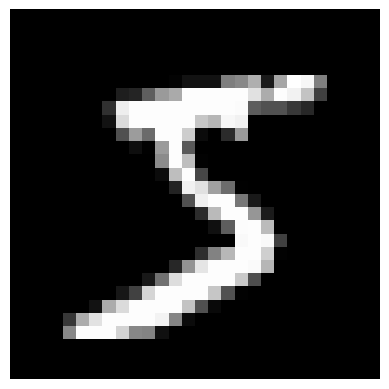

In [32]:
#테스트 이미지 불러오기
import matplotlib.pyplot as plt

def img_show(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28) #  1차원 배열인 이미지 배열 784개의 픽셀을 28x28로 재구성
print(img.shape)

img_show(img)

In [33]:
from actfunc import sigmoid, softmax #우리가 구현 했던 sigmoid, softmax 함수 불러오기

def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,normalize=True,one_hot_label=False)
  return x_test, t_test
#정규화를 True로 하면 0~255사이의 값이던 픽셀이 0.0~1.0로 정규화된다.
def init_network():
  with open("/content/drive/MyDrive/dataset/sample_weight.pkl",'rb') as f: #이미 학습된 가중치와 편향이 저장되있음
    network = pickle.load(f)

    return network


def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'],network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3) + b3

  y = softmax(a3)
  return y


a = init_network()

In [34]:
#신경망 추론 및 정확도 평가
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network,x[i]) # 리턴값은 각 원소일 확률 값
  p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
  if p == t[i]:
    accuracy_cnt += 1

print("정확도:"+str(float(accuracy_cnt)/len(x))) #정확도:0.9352

정확도:0.9352


In [35]:
#2025-05-16
#가중치 매개변수의 형상

print(x.shape) #1차원 784 픽셀 데이터가 만개 있음
print(x[0].shape) # 한행에 784개의 픽셀 데이터
print(network['W1'].shape)
print(network['W2'].shape)
print(network['W3'].shape)

#신경망 각 층의 배열 형상 = 784(입력값) 784 X 50  50 X 100  100 X 10     원소가 10개인 1차원 배열이 출력됨

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [36]:
#배치 처리 위 셀의 코드는 하나의 이미지를 입력했을때 처리의 흐름 그렇다면 이미지를 한번에 100장의 데이터를 넣을순 없을까?

batch_size = 100 #배치 크기 한번에 100개의 데이터를 처리
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network,x_batch)
  p = np.argmax(y_batch, axis = 1) #100x10 배열에서 1차원을 구성하는 각 원소에서 최대값 인덱스를 찾는 것
  accuracy_cnt += np.sum(p == t[i:i+batch_size])


print("정확도:"+str(float(accuracy_cnt)/len(x))) #정확도:0.9352



정확도:0.9352
